# Raspberry Pi Mouse sensor receiver

[raspimouse_http_controller](https://github.com/Tiryoh/raspimouse_http_controller)と組み合わせて使用するラズパイマウスのセンサ値受信用Jupyter Notebookです。

注がある場合を除き、本ページに掲載されているコードはMITライセンスに、文章はクリエイティブ・コモンズ・ライセンスに基づいて公開します。
<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="クリエイティブ・コモンズ・ライセンス" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a>

## Requirements

Python 3を必要とします。

# step1
Pythonのモジュールをインポートします。
Jupyter Notebookでの描画に必要なモジュールと、ラズパイマウスとの通信に必要なモジュールと分かれています。

In [1]:
# 数値計算及び描画に必要なモジュール
import numpy as np
import math
from  matplotlib import pyplot as plt

# 通信用
import urllib.request
import time
import argparse
import json
import threading

# step2

受信用のクラス(Receiver)を作成します。ラズパイマウスとTCP通信を行います。

In [2]:
class Receiver(object):
    def __init__(self, ip, port):
        print("init")
        self.url = "http://{}:{}".format(ip, port)
        print ("connecting to " + self.url)

    def get_sensor_val(self):
        start = time.time()
        request = urllib.request.Request(self.url)
        response = urllib.request.urlopen(request)
        sensor_dict = json.loads(response.read().decode('utf-8'))
        return sensor_dict

# step3

ラズパイマウスと接続を確立します。
引数にはIPアドレスと使用するTCPポートを指定します。

In [3]:
# r = Receiver("192.168.64.3", 5000)
r = Receiver("192.168.22.234", 5000)

init
connecting to http://192.168.22.234:5000


# step4

試しにラズパイマウスからセンサの値を受信し、`print` してみます。

In [4]:
history = []
hoge = r.get_sensor_val()
history.append(hoge)
print(hoge)
print(history)

{'2': 15, '3': -1, '1': 8, '0': 20}
[{'2': 15, '3': -1, '1': 8, '0': 20}]


# step5

今度はラズパイマウスからセンサの値を連続で受信し、最後に `print` してみます。

In [17]:
for i in range(10):
    hoge = r.get_sensor_val()
    history.append(hoge)
    time.sleep(0.1)

print(history)

[{'2': 15, '3': -1, '1': 8, '0': 20}, {'2': 18, '3': 5, '1': 16, '0': 15}, {'2': 22, '3': 9, '1': 12, '0': 11}, {'2': 8, '3': -1, '1': 16, '0': 13}, {'2': 18, '3': 0, '1': 12, '0': 16}, {'2': 7, '3': 3, '1': 14, '0': 20}, {'2': 18, '3': 3, '1': 5, '0': 20}, {'2': 9, '3': 3, '1': 8, '0': 11}, {'2': 16, '3': 7, '1': 15, '0': 16}, {'2': 15, '3': -1, '1': 9, '0': 17}, {'2': 12, '3': 4, '1': 12, '0': 14}, {'2': 13, '3': 6, '1': 9, '0': 10}, {'2': 15, '3': 4, '1': 7, '0': 16}, {'2': 12, '3': 6, '1': 8, '0': 17}, {'2': 10, '3': 10, '1': 11, '0': 14}, {'2': 22, '3': 9, '1': 14, '0': 16}, {'2': 12, '3': -2, '1': 13, '0': 14}, {'2': 13, '3': -3, '1': 10, '0': 21}, {'2': 10, '3': 0, '1': 12, '0': 12}, {'2': 12, '3': 4, '1': 10, '0': 15}, {'2': 12, '3': 6, '1': 13, '0': 14}, {'2': 21, '3': 687, '1': 14, '0': 1005}, {'2': 20, '3': 701, '1': 15, '0': 995}, {'2': 20, '3': 715, '1': 14, '0': 1006}, {'2': 20, '3': 687, '1': 14, '0': 1021}, {'2': 21, '3': 685, '1': 15, '0': 1002}, {'2': 20, '3': 691, '1

# step6

連続して受信したデータを元にグラフを描画してみます。

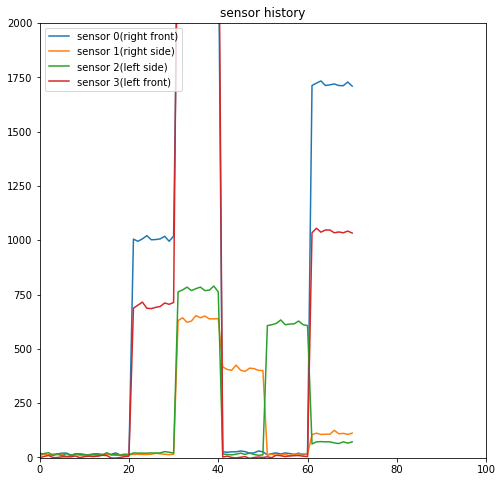

In [18]:
# タイトル付き新規ウィンドウ、座標軸を用意
fig = plt.figure(figsize=(8, 8))
plt.title("sensor history")
world = fig.add_subplot(1,1,1)
world.set_xlim(0,100)
world.set_ylim(-1.5,2000)


x_arr = np.array([])
y1_arr = np.array([])
y2_arr = np.array([])
y3_arr = np.array([])
y0_arr = np.array([])

for i in range(len(history)):
    x_arr = np.append(x_arr, i)
    y0_arr = np.append(y0_arr, history[i]["0"])
    y1_arr = np.append(y1_arr, history[i]["1"])
    y2_arr = np.append(y2_arr, history[i]["2"])
    y3_arr = np.append(y3_arr, history[i]["3"])

plt.plot(x_arr, y0_arr, label = "sensor 0(right front)")
plt.plot(x_arr, y1_arr, label = "sensor 1(right side)")
plt.plot(x_arr, y2_arr, label = "sensor 2(left side)")
plt.plot(x_arr, y3_arr, label = "sensor 3(left front)")

# 左上に凡例を追加
world.legend(loc='upper left')

# 現在の状態を確認
plt.show()